<a href="https://colab.research.google.com/github/Rakeshtolangi/ANPR/blob/main/easyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Import Dependencies

In [5]:
!pip3 install torch torchvision torchaudio
!pip install easyocr

In [9]:
!pip install easyocr
import easyocr
import cv2
from matplotlib import pyplot as pyplot
import numpy as np

ImportError: ignored

In [10]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [11]:
!pip install opencv-python-headless==4.1.2.30


     |████████████████████████████████| 21.8 MB 1.2 MB/s 


In [21]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

1. Read in images or video

In [45]:
IMAGE_PATH = 'image.jpg'

In [46]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[64, 52], [1012, 52], [1012, 270], [64, 270]],
  'Shyla plays',
  0.997964069133266),
 ([[1050, 73], [1588, 73], [1588, 235], [1050, 235]],
  'soccer',
  0.9695500390186841),
 ([[65, 329], [181, 329], [181, 471], [65, 471]], 'I', 0.9944877502894087),
 ([[233, 327], [702, 327], [702, 480], [233, 480]],
  'wrote',
  0.9998752489664025),
 ([[762, 352], [866, 352], [866, 474], [762, 474]], 'a', 0.9355565148543441),
 ([[913, 332], [1307, 332], [1307, 521], [913, 521]],
  'song',
  0.9998840093612671),
 ([[64, 567], [1109, 567], [1109, 788], [64, 788]],
  'You laughed.',
  0.926162203211726),
 ([[530, 831], [1085, 831], [1085, 1007], [530, 1007]],
  'rented',
  0.9999992699951101),
 ([[1137, 865], [1249, 865], [1249, 997], [1137, 997]],
  'a',
  0.9974274512347989),
 ([[1305, 854], [1583, 854], [1583, 1004], [1305, 1004]],
  'van',
  0.9994918785183146),
 ([[92.91756870515997, 806.0266447147471],
   [500.346231796955, 873.6766187370557],
   [460.08243129484003, 1052.9733552852529],
   [52

2. Draw Results

In [47]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result [0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

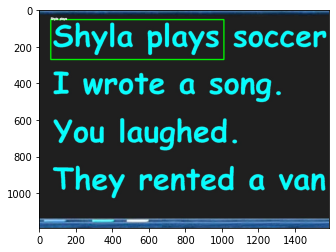

In [48]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
image = cv2.putText(img, text, top_left, font, .5, (255,255,255),2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

3. Handling Multiple Lines

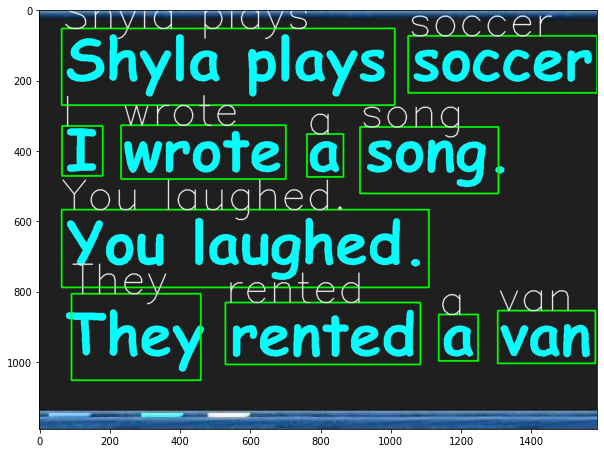

In [49]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 3)
  img = cv2.putText(img, text, top_left, font, 4, (255,255,255),2, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()